In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('Control_3_Day_1_croppedDLC_resnet152_dlc_realApr6shuffle20_200000.csv', header=[1,2])
df = main_df.drop(('bodyparts','coords'), axis=1)
df = df.drop('likelihood', axis=1, level=1)
df.head()

left_ear               right_ear                   snout              \
            x           y           x           y           x           y   
0  422.572449  334.554688  426.389252  320.220978  408.666931  323.251801   
1  421.721710  337.860016  424.029358  322.344299  404.720764  327.336304   
2  413.644257  339.730347  417.095673  324.515594  397.776123  328.640259   
3  406.461609  340.075470  410.291473  324.840851  390.760651  328.192963   
4  398.275574  340.687469  402.520172  326.831451  382.400391  328.198761   

       center               left_side              ... paw_f_right  \
            x           y           x           y  ...           x   
0  453.090485  326.848969  452.345490  340.032410  ...  413.907959   
1  450.317871  328.638275  449.168976  342.380371  ...  427.681274   
2  444.206573  330.616211  444.561951  344.129700  ...  409.952728   
3  437.711334  330.743591  438.416321  344.570862  ...  395.190918   
4  429.270447  330.696747  432.207275  347.032501  ...  392.670166   

               paw_f_left             paw_h_right              paw_h_left  \
            y           x           y           x           y           x   
0  316.497711  409.638275  337.059174  454.776520  302.092010  435.171722   
1  307.907654  404.702850  340.876648  455.340485  308.586456  451.587677   
2  317.517517  399.521271  341.035522  450.954559  308.526398  451.550720   
3  323.246613  391.233795  341.621918  447.642120  307.668915  446.690094   
4  320.076660  384.017487  340.731995  446.400269  307.929626  446.770996   

                 tail_tip              
            y           x           y  
0  340.880463  515.308716  391.993683  
1  347.706268  515.865845  392.401184  
2  344.310181  514.262024  387.548035  
3  343.755035  512.253113  386.138855  
4  344.538910  512.564575  380.463501  

[5 rows x 26 columns]

In [3]:
df.columns.levels

FrozenList([['bodyparts', 'center', 'left_ear', 'left_side', 'paw_f_left', 'paw_f_right', 'paw_h_left', 'paw_h_right', 'right_ear', 'right_side', 'snout', 'tail_base', 'tail_mid', 'tail_tip'], ['coords', 'likelihood', 'x', 'y']])

In [4]:
center = df['center'].copy()

for col in df.columns.levels[0]:
    if col != 'bodyparts':
        df[col] = df[col] - center

df.head()

left_ear            right_ear                snout           center       \
           x         y          x         y          x         y      x    y   
0 -30.518036  7.705719 -26.701233 -6.627991 -44.423553 -3.597168    0.0  0.0   
1 -28.596161  9.221741 -26.288513 -6.293976 -45.597107 -1.301971    0.0  0.0   
2 -30.562317  9.114136 -27.110901 -6.100616 -46.430450 -1.975952    0.0  0.0   
3 -31.249725  9.331879 -27.419861 -5.902740 -46.950684 -2.550629    0.0  0.0   
4 -30.994873  9.990723 -26.750275 -3.865295 -46.870056 -2.497986    0.0  0.0   

  left_side             ... paw_f_right            paw_f_left             \
          x          y  ...           x          y          x          y   
0 -0.744995  13.183441  ...  -39.182526 -10.351257 -43.452209  10.210205   
1 -1.148895  13.742096  ...  -22.636597 -20.730621 -45.615021  12.238373   
2  0.355377  13.513489  ...  -34.253845 -13.098694 -44.685303  10.419312   
3  0.704987  13.827271  ...  -42.520416  -7.496979 -46.477539  10.878326   
4  2.936829  16.335754  ...  -36.600281 -10.620087 -45.252960  10.035248   

  paw_h_right            paw_h_left              tail_tip             
            x          y          x          y          x          y  
0    1.686035 -24.756958 -17.918762  14.031494  62.218231  65.144714  
1    5.022614 -20.051819   1.269806  19.067993  65.547974  63.762909  
2    6.747986 -22.089813   7.344147  13.693970  70.055450  56.931824  
3    9.930786 -23.074677   8.978760  13.011444  74.541779  55.395264  
4   17.129822 -22.767120  17.500549  13.842163  83.294128  49.766754  

[5 rows x 26 columns]

In [5]:
df.columns.levels

FrozenList([['bodyparts', 'center', 'left_ear', 'left_side', 'paw_f_left', 'paw_f_right', 'paw_h_left', 'paw_h_right', 'right_ear', 'right_side', 'snout', 'tail_base', 'tail_mid', 'tail_tip'], ['coords', 'likelihood', 'x', 'y']])

In [6]:
skeleton = [['snout', 'left_ear'], ['snout', 'right_ear'], ['right_ear', 'left_ear'], ['left_ear', 'left_side'],
           ['right_ear', 'right_side'], ['right_side', 'tail_base'], ['left_side', 'tail_base'],
            ['tail_base', 'tail_mid'], ['tail_mid', 'tail_tip']]

In [7]:
def plotter(to_plot, skeleton, indexes):
    plt.figure(figsize=(12,12))
    indexcounter=1
    for i in indexes:
        plt.subplot(4,4,indexcounter)
        for bp in df.columns.levels[0][1:]:
            plt.scatter(x=to_plot.loc[i, (bp, 'x')], y=to_plot.loc[i, (bp, 'y')])
        
        for bp_pair in skeleton:
            plt.plot([to_plot.loc[i, (bp_pair[0], 'x')], to_plot.loc[i, (bp_pair[1], 'x')]],
                    [to_plot.loc[i, (bp_pair[0], 'y')], to_plot.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)

        indexcounter +=1
        #plt.xlim(0, 700)
        #plt.ylim(0, 700)
        
    plt.show()

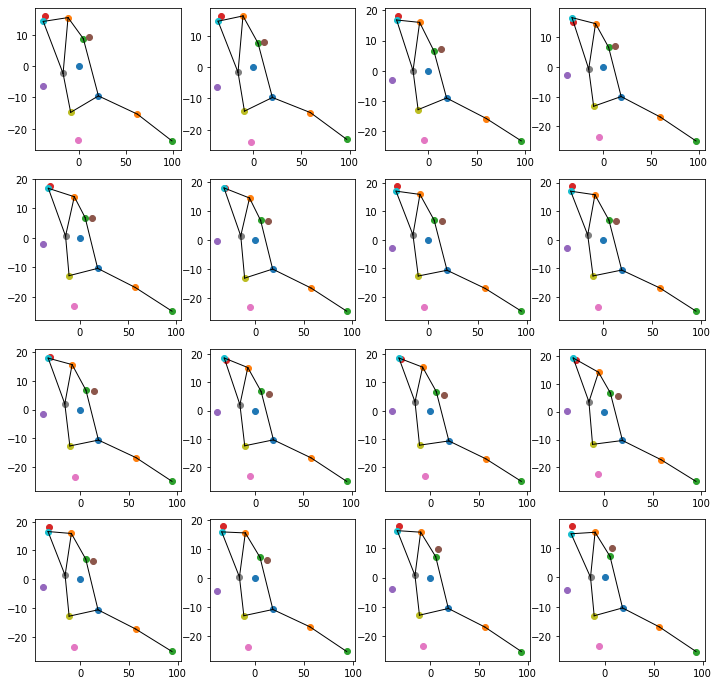

In [8]:
plotter(to_plot=df, skeleton=skeleton, indexes=range(10000, 10016))

In [9]:
subset = df.sample(n=1000)

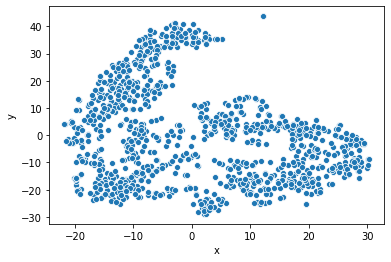

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, n_iter=20000, n_iter_without_progress=500, init='random')
transformed = tsne.fit_transform(subset)
transformed = pd.DataFrame(transformed, columns=['x','y'])
sns.scatterplot(data=transformed, x='x', y='y')

transformed.index = subset.index

In [11]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=30, init='k-means++', n_init=30, max_iter=3000, tol=0.0001, algorithm='auto')
transformed_km = km.fit_transform(subset)

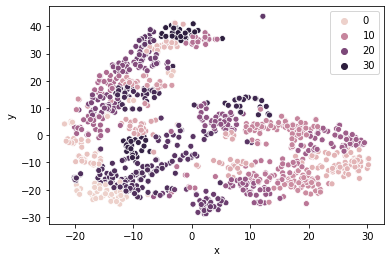

In [12]:
sns.scatterplot(data=transformed, x='x', y='y', hue=km.labels_)

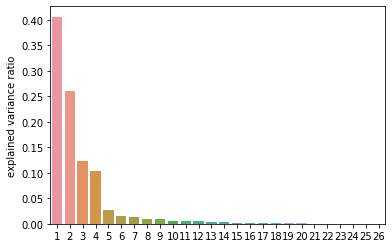

In [13]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, svd_solver='full')

pca_transformed = pca.fit_transform(subset)

expVar = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['explained variance ratio'])
expVar
sns.barplot(data=expVar, y='explained variance ratio', x=list(range(1,27)))

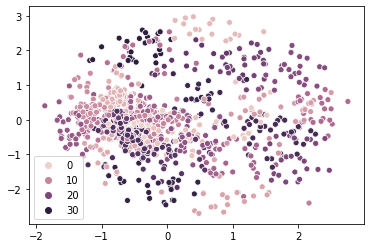

In [14]:
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=km.labels_)

In [15]:
#index = transformed[transformed['y'] < 28].index

#to_plot = df.iloc[index, :]

#plotter(subset, skeleton, to_plot.index[:16])

In [21]:
for col in df.columns:
    if col in main_df.columns:
        main_df[col] = df[col]

In [22]:
main_df

bodyparts   left_ear                        right_ear             \
          coords          x          y likelihood          x          y   
0              0 -30.518036   7.705719   0.991110 -26.701233  -6.627991   
1              1 -28.596161   9.221741   0.998173 -26.288513  -6.293976   
2              2 -30.562317   9.114136   0.993832 -27.110901  -6.100616   
3              3 -31.249725   9.331879   0.998014 -27.419861  -5.902740   
4              4 -30.994873   9.990723   0.994904 -26.750275  -3.865295   
...          ...        ...        ...        ...        ...        ...   
107995    107995  19.319519  22.242607   0.993145   4.392372  26.413864   
107996    107996  19.417587  22.026451   0.994120   4.367477  26.595100   
107997    107997  19.221649  22.561661   0.995702   4.012810  26.675644   
107998    107998  19.165398  22.290581   0.996117   4.220947  26.323624   
107999    107999  19.565269  22.931770   0.996614   4.107010  26.528206   

                       snout                        ... paw_f_left  \
       likelihood          x          y likelihood  ... likelihood   
0        0.991723 -44.423553  -3.597168   0.998405  ...   0.066253   
1        0.998418 -45.597107  -1.301971   0.999147  ...   0.062036   
2        0.998158 -46.430450  -1.975952   0.998646  ...   0.049839   
3        0.996960 -46.950684  -2.550629   0.998691  ...   0.093776   
4        0.997294 -46.870056  -2.497986   0.999105  ...   0.039734   
...           ...        ...        ...        ...  ...        ...   
107995   0.985303  22.953026  45.513817   0.999796  ...   0.021063   
107996   0.987850  23.125488  45.101730   0.999786  ...   0.022161   
107997   0.990523  23.085541  45.093964   0.999805  ...   0.022744   
107998   0.990774  23.181267  44.380814   0.999784  ...   0.023519   
107999   0.990615  23.103691  44.002716   0.999711  ...   0.023139   

       paw_h_right                       paw_h_left                        \
                 x          y likelihood          x          y likelihood   
0         1.686035 -24.756958   0.578103 -17.918762  14.031494   0.052122   
1         5.022614 -20.051819   0.712400   1.269806  19.067993   0.070218   
2         6.747986 -22.089813   0.884088   7.344147  13.693970   0.061601   
3         9.930786 -23.074677   0.895592   8.978760  13.011444   0.057474   
4        17.129822 -22.767120   0.853338  17.500549  13.842163   0.063387   
...            ...        ...        ...        ...        ...        ...   
107995  -16.552902  23.338272   0.135074  26.610992   0.216103   0.141039   
107996  -16.385700  23.076675   0.139530  27.290146   0.164444   0.159301   
107997  -16.831409  22.744194   0.141697  26.977180   0.015930   0.162247   
107998  -16.503387  22.757210   0.128143  26.989120   0.087982   0.164915   
107999  -16.689785  22.419968   0.134916  27.214928  -0.259117   0.155539   

         tail_tip                        
                x          y likelihood  
0       62.218231  65.144714   0.998596  
1       65.547974  63.762909   0.999154  
2       70.055450  56.931824   0.999622  
3       74.541779  55.395264   0.998923  
4       83.294128  49.766754   0.997984  
...           ...        ...        ...  
107995 -23.157925  53.301834   0.999796  
107996 -23.089054  52.812592   0.999788  
107997 -22.994900  52.512962   0.999797  
107998 -23.289291  52.754387   0.999782  
107999 -22.880585  51.838928   0.999798  

[108000 rows x 40 columns]